In [1]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot as plt
import ants
import os
from tqdm import tqdm
import statistics
import statsmodels.api as sm

In [2]:
cd ../Data/Genemaps

[Errno 2] No such file or directory: '../Data/Genemaps'
/mmfs1/data/pijarj/BC-ORG-Data/Code/Genes


In [3]:
#read in symptom patient data and slice out important columns
df = pd.read_csv('/mmfs1/data/pijarj/Data4Julianna/df_patients_S699.csv')
df.columns
df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']]

,ados_total,ados_comm,ados_social,ados_rrb
0,18.0,6.0,12.0,2.0
1,NaN,NaN,NaN,NaN
2,13.0,4.0,9.0,NaN
3,12.0,4.0,8.0,2.0
4,16.0,5.0,11.0,3.0
...,...,...,...,...
694,NaN,NaN,NaN,NaN
695,NaN,NaN,NaN,NaN
696,13.0,4.0,9.0,2.0
697,8.0,2.0,6.0,2.0


In [4]:
#load in cmat data
diffmat = np.load('/mmfs1/data/pijarj/Data4Julianna/recon_asd_mu.npz')
diffmat = diffmat['data']
diffmat.shape

(699, 51, 51)

In [5]:
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')

In [6]:
genemaps = [file for file in os.listdir() if file.endswith('.nii.gz')]
genemaps.sort()

In [7]:
nsubjects = 699
ngenes = len(genemaps)
print(nsubjects)
print(ngenes)

gene_fmri_corr = np.zeros((ngenes,nsubjects))
gene_fmri_corr

699
0


array([], shape=(0, 699), dtype=float64)

In [8]:
for g in tqdm(range(ngenes)):
    gene_im = ants.image_read(genemaps[g])
    gene_flat = gene_im.numpy().flatten()
    atlas_flat = atlas.numpy().flatten()
    roi_expression = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])
    gene_sim = np.zeros((51,51))
    for i in range(51):
        for j in range(51):
            gene_sim[i,j] = abs(roi_expression[i]-roi_expression[j])

    triu = np.triu_indices(51,k=1)
    gene_vec = gene_sim[triu]

    for s in range(nsubjects):
        subject_diffmat = diffmat[s,:,:] # correlation matrices for one subject
        fmri_vec = subject_diffmat[triu]
        data = np.corrcoef(gene_vec,fmri_vec)[0,1]
        gene_fmri_corr[g,s] = data

0it [00:00, ?it/s]


<ipython-input-9-3b6dc5dc04f6>:2: UserWarning:

Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.



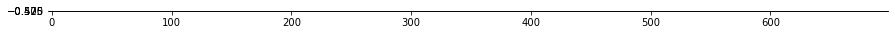

In [9]:
plt.figure(figsize=(15,10))
plt.imshow(gene_fmri_corr)

In [10]:
col_id = 0
Y_total = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_total = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_total = ~np.isnan(Y_total)[:,col_id]
Y_use_total = Y_total[good_subjects_total,col_id] 
X_use_total = gene_fmri_corr[:,good_subjects_total]
X_use_total = X_use_total.transpose()
regression_total =  linear_model.LinearRegression(normalize=True)
linear_regression_total = regression_total.fit(X_use_total,Y_use_total) 
Y_use_hat_total = linear_regression_total.predict(X_use_total)

ValueError: Found array with 0 feature(s) (shape=(429, 0)) while a minimum of 1 is required.

In [ ]:
#scatter plot for ados_total
plt.scatter(Y_use_total,Y_use_hat_total,color='mediumaquamarine')
plt.title('ADOS TOTAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [ ]:
col_id = 1
Y_comm = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_comm = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_comm = ~np.isnan(Y_comm)[:,col_id]
Y_use_comm = Y_comm[good_subjects_comm,col_id] 
X_use_comm = gene_fmri_corr[:,good_subjects_comm]
X_use_comm = X_use_comm.transpose()
regression_comm =  linear_model.LinearRegression(normalize=True)
linear_regression_comm = regression_comm.fit(X_use_comm,Y_use_comm) 
Y_use_hat_comm = linear_regression_comm.predict(X_use_comm)

In [ ]:
#scatter plot for ados_comm
plt.scatter(Y_use_comm,Y_use_hat_comm,color='cornflowerblue')
plt.title('ADOS COMM')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [ ]:
col_id = 2
Y_social = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_social = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_social = ~np.isnan(Y_social)[:,col_id]
Y_use_social = Y_social[good_subjects_social,col_id] 
X_use_social = gene_fmri_corr[:,good_subjects_social]
X_use_social = X_use_social.transpose()
regression_social =  linear_model.LinearRegression(normalize=True)
linear_regression_social = regression_social.fit(X_use_social,Y_use_social) 
Y_use_hat_social = linear_regression_social.predict(X_use_social)

In [ ]:
#scatter plot for ados_social
plt.scatter(Y_use_social,Y_use_hat_social,color='mediumvioletred')
plt.title('ADOS SOCIAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [ ]:
col_id = 3
Y_rrb = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_rrb = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_rrb = ~np.isnan(Y_rrb)[:,col_id]
Y_use_rrb = Y_rrb[good_subjects_rrb,col_id] 
X_use_rrb = gene_fmri_corr[:,good_subjects_rrb]
X_use_rrb = X_use_rrb.transpose()
regression_rrb =  linear_model.LinearRegression(normalize=True)
linear_regression_rrb = regression_rrb.fit(X_use_rrb,Y_use_rrb) 
Y_use_hat_rrb = linear_regression_rrb.predict(X_use_rrb)

In [ ]:
#scatter plot for ados_rrb
plt.scatter(Y_use_rrb,Y_use_hat_rrb,color='rebeccapurple')
plt.title('ADOS RRB')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [ ]:
#variance explained for ados_total
from sklearn.metrics import explained_variance_score
total = explained_variance_score(Y_use_total,Y_use_hat_total)*100
print(total)

In [ ]:
#variance explained for ados_comm
from sklearn.metrics import explained_variance_score
comm = explained_variance_score(Y_use_comm,Y_use_hat_comm)*100
print(comm)

In [ ]:
#variance explained for ados_social
from sklearn.metrics import explained_variance_score
social = explained_variance_score(Y_use_social,Y_use_hat_social)*100
print(social)

In [ ]:
#variance explained for ados_rrb
from sklearn.metrics import explained_variance_score
rrb = explained_variance_score(Y_use_rrb,Y_use_hat_rrb)*100
print(rrb)

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
var_explained = total, comm, social, rrb
plt.bar(ados_label,var_explained,color='steelblue')
plt.title('ADOS Variance Explained',color='darkslateblue')
plt.ylabel('Percent Variance Explained',color='darkslateblue')
plt.xlabel('Symptom',color='darkslateblue')

In [ ]:
#variance explained of denoised vs not denoised
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
x_axis = np.arange(len(ados_label))

#not denoised is asd_mu
not_denoised = var_explained

#denoised is diffmat
denoised = [2.651116934212927,1.369006035359288,4.331740939194462,2.0557265540216085]

#plot bar graph
plt.bar(x_axis-0.2,not_denoised,0.4,label='Not Denoised (asd_mu)',color='palegreen')
plt.bar(x_axis+0.2,denoised,0.4,label='Denoised (diffmat)',color='forestgreen')
plt.title('ADOS Variance Explained In Not Denoised vs Denoised',color='darkgreen')
plt.xticks(x_axis, ados_label,color='darkgreen')
plt.xlabel('Symptom',color='darkgreen')
plt.ylabel('Percent Variance Explained',color='darkgreen')
plt.legend()
plt.show()

In [ ]:
#correlation coefficents for ados_total
coefficient_total = regression_total.coef_
labels = ['NLGN4Y', 'POGZ', 'FMR1', 'CNTNAP2', 'NLGN3','NLGN4X', 'MECP2', 'MET', 'OXTR', 'RELN','SHANK3', 'SLC6A4', 'NRXN1']
print(column_total)
print()
for i in range(0,13):
    print(f'{labels[i]},{coefficient_total[i]}')

In [ ]:
#correlation coefficents for ados_comm
coefficient_comm = regression_comm.coef_
labels = ['NLGN4Y', 'POGZ', 'FMR1', 'CNTNAP2', 'NLGN3','NLGN4X', 'MECP2', 'MET', 'OXTR', 'RELN','SHANK3', 'SLC6A4', 'NRXN1']
print(column_comm)
print()
for i in range(0,13):
    print(f'{labels[i]},{coefficient_comm[i]}')

In [ ]:
#correlation coefficents for ados_social
coefficient_social = regression_social.coef_
labels = ['NLGN4Y', 'POGZ', 'FMR1', 'CNTNAP2', 'NLGN3','NLGN4X', 'MECP2', 'MET', 'OXTR', 'RELN','SHANK3', 'SLC6A4', 'NRXN1']
print(column_social)
print()
for i in range(0,13):
    print(f'{labels[i]},{coefficient_social[i]}')

In [ ]:
#correlation coefficents for ados_rrb
coefficient_rrb = regression_rrb.coef_
labels = ['NLGN4Y', 'POGZ', 'FMR1', 'CNTNAP2', 'NLGN3','NLGN4X', 'MECP2', 'MET', 'OXTR', 'RELN','SHANK3', 'SLC6A4', 'NRXN1']
print(column_rrb)
print()
for i in range(0,13):
    print(f'{labels[i]},{coefficient_rrb[i]}')

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_total,color='lightseagreen')
plt.title('Gene Correlation Coefficients for ADOS TOTAL',color='teal')
plt.ylabel('Correlation Coefficient',color='teal')
plt.xlabel('Gene',color='teal')
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_comm,color='blueviolet')
plt.title('Gene Correlation Coefficients for ADOS COMM',color='indigo')
plt.ylabel('Correlation Coefficient',color='indigo')
plt.xlabel('Gene',color='indigo')
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_social,color='orchid')
plt.title('Gene Correlation Coefficients for ADOS SOCIAL',color='darkmagenta')
plt.ylabel('Correlation Coefficient',color='darkmagenta')
plt.xlabel('Gene',color='darkmagenta')
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_rrb,color='goldenrod')
plt.title('Gene Correlation Coefficients for ADOS RRB',color='peru')
plt.ylabel('Correlation Coefficient',color='peru')
plt.xlabel('Gene',color='peru')
plt.show()

In [ ]:
#significance of coefficients for ados_total
print('ADOS_TOTAL')
X_total = X_use_total.copy()
Y_total = Y_use_total.copy()
X_total = sm.add_constant(X_total)
print(X_total.shape)
print(Y_total.shape)

est_total = sm.OLS(Y_total, X_total)
est2_total = est_total.fit()
print(est2_total.summary())

In [ ]:
def plot_errorbar_from_table(est2_total,labels):
    coef_total = est2_total.params[1::]
    ci_total = est2_total.conf_int()[1::,:]
    ci_rel_total = abs(np.vstack((coef_total,coef_total)).transpose() - ci_total)
    ci_rel_total = ci_rel_total.transpose()
    xs_total = np.arange(len(coef_total))

    plt.figure(figsize=(15,5))
    plt.bar(xs_total,coef_total,color='bisque')
    plt.errorbar(xs_total,coef_total,ci_rel_total,fmt='r ',capsize=10,ecolor='orangered')
    plt.xticks(xs_total,labels=labels);

In [ ]:
plot_errorbar_from_table(est2_total,labels)
plt.title('Coefficient with Errorbar For ADOS_TOTAL',color='orangered')
plt.ylabel('Correlation Coefficient',color='orangered')
plt.xlabel('Gene',color='orangered')

In [ ]:
#significance of coefficients for ados_comm
print('ADOS_COMM')
X_comm = X_use_comm.copy()
Y_comm = Y_use_comm.copy()
X_comm = sm.add_constant(X_comm)

est_comm = sm.OLS(Y_comm, X_comm)
est2_comm = est_comm.fit()
print(est2_comm.summary())

In [ ]:
def plot_errorbar_from_table(est2_comm,labels):
    coef_comm = est2_comm.params[1::]
    ci_comm = est2_comm.conf_int()[1::,:]
    ci_rel_comm = abs(np.vstack((coef_comm,coef_comm)).transpose() - ci_comm)
    ci_rel_comm = ci_rel_comm.transpose()
    xs_comm = np.arange(len(coef_comm))

    plt.figure(figsize=(15,5))
    plt.bar(xs_comm,coef_comm,color='powderblue')
    plt.errorbar(xs_comm,coef_comm,ci_rel_comm,fmt='r ',capsize=10,ecolor='slateblue')
    plt.xticks(xs_comm,labels=labels);

In [ ]:
plot_errorbar_from_table(est2_comm,labels)
plt.title('Coefficient with Errorbar For ADOS_COMM',color='slateblue')
plt.ylabel('Correlation Coefficient',color='slateblue')
plt.xlabel('Gene',color='slateblue')

In [ ]:
#significance of coefficients for ados_social
print('ADOS_SOCIAL')
X_social = X_use_social.copy()
Y_social = Y_use_social.copy()
X_social = sm.add_constant(X_social)

est_social = sm.OLS(Y_social, X_social)
est2_social = est.fit()
print(est2_social.summary())

In [ ]:
def plot_errorbar_from_table(est2_social,labels):
    coef_social = est2_social.params[1::]
    ci_social = est2_social.conf_int()[1::,:]
    ci_rel_social = abs(np.vstack((coef_social,coef_social)).transpose() - ci_social)
    ci_rel_social = ci_rel_social.transpose()
    xs_social = np.arange(len(coef_social))

    plt.figure(figsize=(15,5))
    plt.bar(xs_social,coef_social,color='thistle')
    plt.errorbar(xs_social,coef_social,ci_rel_social,fmt='r ',capsize=10,ecolor='rebeccapurple')
    plt.xticks(xs_social,labels=labels);

In [ ]:
plot_errorbar_from_table(est2_social,labels)
plt.title('Coefficient with Errorbar For ADOS_SOCIAL',color='rebeccapurple')
plt.ylabel('Correlation Coefficient',color='rebeccapurple')
plt.xlabel('Gene',color='rebeccapurple')

In [ ]:
#significance of coefficients for ados_rrb
print('ADOS_RRB')
X_rrb = X_use_rrb.copy()
Y_rrb = Y_use_rrb.copy()
X_rrb = sm.add_constant(X_rrb)

est_rrb = sm.OLS(Y_rrb, X_rrb)
est2_rrb = est.fit()
print(est2_rrb.summary())

In [ ]:
def plot_errorbar_from_table(est2_rrb,labels):
    coef_rrb = est2_rrb.params[1::]
    ci_rrb = est2_rrb.conf_int()[1::,:]
    ci_rel_rrb = abs(np.vstack((coef_rrb,coef_rrb)).transpose() - ci_rrb)
    ci_rel_rrb = ci_rel_rrb.transpose()
    xs_rrb = np.arange(len(coef_rrb))

    plt.figure(figsize=(15,5))
    plt.bar(xs_rrb,coef_rrb,color='lightpink')
    plt.errorbar(xs_rrb,coef_rrb,ci_rel_rrb,fmt='r ',capsize=10,ecolor='crimson')
    plt.xticks(xs_rrb,labels=labels);

In [ ]:
plot_errorbar_from_table(est2_rrb,labels)
plt.title('Coefficient with Errorbar For ADOS_RRB',color='crimson')
plt.ylabel('Correlation Coefficient',color='crimson')
plt.xlabel('Gene',color='crimson')

In [ ]:
# REFERENCE 
a = np.array([5,5,5])
l = np.array([1,1,1])
h = np.array([6,6,6])
se = np.vstack((l,h))
se

xs = [0,1,2]
plt.bar(xs,a)
plt.errorbar(xs,a,abs(se-a),fmt='r ')